In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('./movielens_movies.csv') #Read dataset
#ratings_df_600 = ratings_df.head(600000) #Get first 600000 rows of dataset

In [ ]:
df.head(100)

,Unnamed: 0,movie_id,title,genres
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
95,95,97,"Hate (Haine, La) (1995)",Drama
96,96,98,Shopping (1994),Action|Thriller
97,97,99,Heidi Fleiss: Hollywood Madam (1995),Documentary
98,98,100,City Hall (1996),Drama|Thriller


In [ ]:
# Download necessary resources
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('wordnet')  # For lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the stopwords
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Punctuation removal
    tokens = [token for token in tokens if token not in string.punctuation]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove numbers
    number_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|\d+)\b'
    tokens = [re.sub(number_pattern, '', token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    # Remove additional whitespace
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text)

    return preprocessed_text.strip()


In [ ]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()


In [ ]:
# Select the columns to join
columns_to_join = ['title', 'genres']

# Create a new column by joining the selected columns
df['Joined_Column'] = df[columns_to_join].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [ ]:
df['Joined_Column'][2]

'Grumpier Old Men (1995), Comedy|Romance'

In [ ]:
def text_preprocess_mod(text):
    # Remove leading/trailing spaces
    text = text.strip()

    # Convert to lowercase
    text = text.lower()

    # Remove spaces between names
    text = re.sub(r'\s+', '', text)

    # Reolace spaces instead ,
    text = text.replace(",", " ")

    return text

In [ ]:
# Apply text preprocessing to the Joined_Column
df['Preprocessed_Joined_Column'] = df['Joined_Column'].apply(text_preprocess_mod)

In [ ]:
df['Joined_Column'][7]

"Tom and Huck (1995), Adventure|Children's"

In [ ]:
df['Preprocessed_Joined_Column'][7]

"tomandhuck(1995) adventure|children's"

In [ ]:
# Fit the vectorizer on the 'Overview' column
overview_vectors_mod = vectorizer.fit_transform(df['Preprocessed_Joined_Column'])

In [ ]:
print(overview_vectors_mod)

  (0, 922)	0.19437497710216609
  (0, 841)	0.33400383346972634
  (0, 291)	0.4114413514148407
  (0, 83)	0.3064352792685
  (0, 4271)	0.766468030298476
  (1, 1388)	0.42893450171530223
  (1, 146)	0.3082936393494536
  (1, 2167)	0.7308598169376717
  (1, 841)	0.3184868395503777
  (1, 83)	0.29219905234952304
  (2, 3403)	0.3113935307813091
  (2, 1737)	0.8588832232445914
  (2, 922)	0.21781131143407326
  (2, 83)	0.3433830374784115
  (3, 1218)	0.19488724327387558
  (3, 4443)	0.8864900557411717
  (3, 922)	0.22481235677747324
  (3, 83)	0.35442029812255593
  (4, 1406)	0.9038202178430272
  (4, 922)	0.22920725614517842
  (4, 83)	0.36134892769812016
  (5, 4195)	0.2807341943854882
  (5, 992)	0.358054488788989
  (5, 137)	0.27871240518152235
  (5, 1819)	0.7853192116190336
  :	:
  (3876, 1613)	0.7909629782976019
  (3876, 89)	0.40762495241318103
  (3876, 4195)	0.29679112735120117
  (3876, 137)	0.29465369945993564
  (3876, 1218)	0.18252038037686805
  (3877, 1613)	0.7726547233880249
  (3877, 59)	0.5647568330597

In [ ]:
# reduce dimensionality for improved performance
svd = TruncatedSVD(n_components=3000)
reduced_data = svd.fit_transform(overview_vectors_mod)

**Question 5**

In [ ]:
cosine_sim = cosine_similarity(reduced_data)
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    indx = indices[title]
    sim_scores = list(enumerate(cosine_sim[indx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = df.loc[movie_indices, 'title'].reset_index(drop=True)
    cosine_similarity_scores = [i[1] for i in sim_scores]
    result_df = pd.DataFrame({'title': recommended_movies, 'Cosine_Similarity': cosine_similarity_scores})
    return result_df

In [ ]:
def show_result(recommended_items):
    # Convert cosine similarity values to numeric
    recommended_items['Cosine_Similarity'] = pd.to_numeric(recommended_items['Cosine_Similarity'])

    # Sort the DataFrame by cosine similarity in descending order
    recommended_items = recommended_items.sort_values('Cosine_Similarity', ascending=False)

    # Create a bar plot using Seaborn
    sns.barplot(x='Cosine_Similarity', y='title', data=recommended_items.head(20), orient='h')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Recommended Items')
    plt.title('Top 20 Recommended Items')
    plt.show()

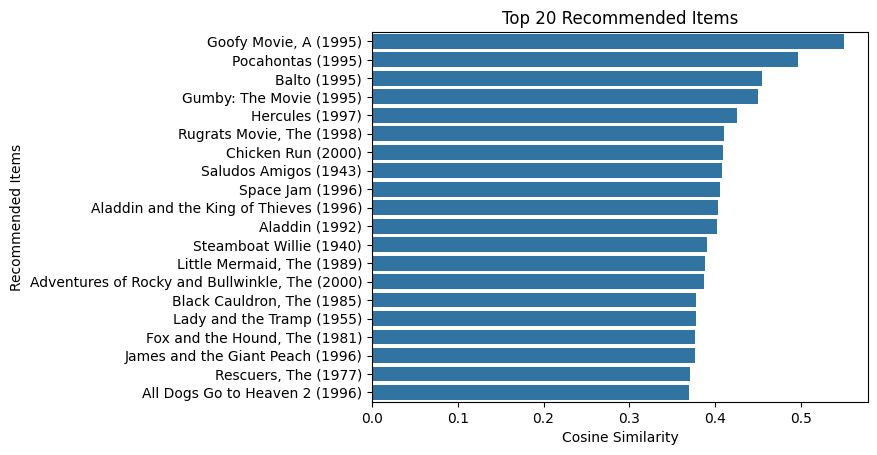

In [ ]:

title = 'Toy Story (1995)'

# Call the 'get_recommendations' function
recommended_items = get_recommendations(title)

# Call the 'show_result' function
show_result(recommended_items)

In [ ]:
get_recommendations('Toy Story (1995)',cosine_sim)

,title,Cosine_Similarity
0,"Goofy Movie, A (1995)",0.550451
1,Pocahontas (1995),0.496681
2,Balto (1995),0.454613
3,Gumby: The Movie (1995),0.450057
4,Hercules (1997),0.425762
5,"Rugrats Movie, The (1998)",0.410650
6,Chicken Run (2000),0.409109
7,Saludos Amigos (1943),0.407878
8,Space Jam (1996),0.406058
9,Aladdin and the King of Thieves (1996),0.403447


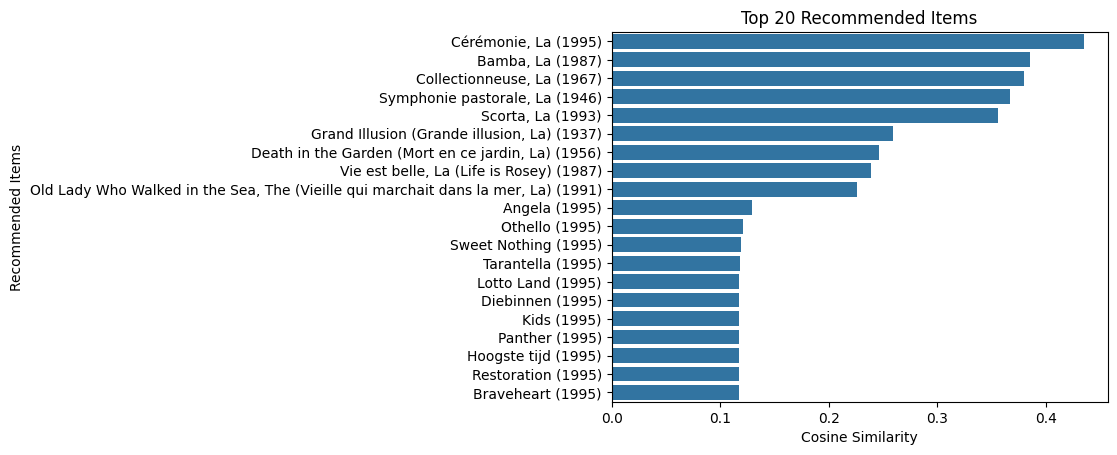

In [ ]:

title = 'Hate (Haine, La) (1995)'

# Call the 'get_recommendations' function
recommended_items = get_recommendations(title)

# Call the 'show_result' function
show_result(recommended_items)

In [ ]:
get_recommendations('Hate (Haine, La) (1995)',cosine_sim)

,title,Cosine_Similarity
0,"Cérémonie, La (1995)",0.435326
1,"Bamba, La (1987)",0.385787
2,"Collectionneuse, La (1967)",0.379840
3,"Symphonie pastorale, La (1946)",0.366845
4,"Scorta, La (1993)",0.356233
5,"Grand Illusion (Grande illusion, La) (1937)",0.259206
6,"Death in the Garden (Mort en ce jardin, La) (1...",0.246645
7,"Vie est belle, La (Life is Rosey) (1987)",0.238932
8,"Old Lady Who Walked in the Sea, The (Vieille q...",0.226430
9,Angela (1995),0.129761


In [ ]:
df

,Unnamed: 0,movie_id,title,genres,Joined_Column,Preprocessed_Joined_Column
0,0,1,Toy Story (1995),Animation|Children's|Comedy,"Toy Story (1995), Animation|Children's|Comedy",toystory(1995) animation|children's|comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy,"Jumanji (1995), Adventure|Children's|Fantasy",jumanji(1995) adventure|children's|fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance,"Grumpier Old Men (1995), Comedy|Romance",grumpieroldmen(1995) comedy|romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama,"Waiting to Exhale (1995), Comedy|Drama",waitingtoexhale(1995) comedy|drama
4,4,5,Father of the Bride Part II (1995),Comedy,"Father of the Bride Part II (1995), Comedy",fatherofthebridepartii(1995) comedy
...,...,...,...,...,...,...
3878,3878,3948,Meet the Parents (2000),Comedy,"Meet the Parents (2000), Comedy",meettheparents(2000) comedy
3879,3879,3949,Requiem for a Dream (2000),Drama,"Requiem for a Dream (2000), Drama",requiemforadream(2000) drama
3880,3880,3950,Tigerland (2000),Drama,"Tigerland (2000), Drama",tigerland(2000) drama
3881,3881,3951,Two Family House (2000),Drama,"Two Family House (2000), Drama",twofamilyhouse(2000) drama


In [ ]:
##### import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Read the movie data from 'movielens_movies.csv'
df = pd.read_csv('movielens_movies.csv')

# Function to recommend random movies
def recommend_random_movies(df, n=20):
    random_movies = df.sample(n)
    random_movies['title_genre'] = random_movies['title'] + ' ' + random_movies['genres']
    return random_movies[['title_genre']]

# Function to get user ratings for movies
user_ratings = {}
def get_user_ratings(id, rating):
    print('user_rating', user_ratings)
    user_ratings[id] = rating

# Function to recommend movies based on cosine similarity to user's rated movies
def recommend_similar_movies(df, cosine_sim, user_ratings, n=10):
    # Get the indices of movies rated 4 or 5 by the user
    rated_movies_indices = np.where((user_ratings == 4) | (user_ratings == 5))[0]

    # Get the cosine similarity scores for the rated movies
    similarity_scores = cosine_sim[rated_movies_indices].sum(axis=0)

    # Sort the movies based on similarity scores
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Get the top N similar movie indices
    top_movie_indices = sorted_indices[:n]

    # Get the details of the recommended movies
    recommended_movies = df.iloc[top_movie_indices][['title', 'genres']]
    recommended_movies['title_genre'] = recommended_movies['title'] + ' ' + recommended_movies['genres']

    return recommended_movies[['title_genre']]



In [ ]:
import time
user_history = []

def get_movies_list():
    movies = []
    for index, row in recommend_random_movies(df).iterrows():
        movies.append({
           "id": row['title_genre']
        })
    return movies

async def get_recommended_movies_list():
    recommended_movies_by_ratings = recommend_similar_movies(df, cosine_sim, pd.Series(user_ratings.values()), n=10)
    print("Recommended Movies based on Ratings:")
    print(recommended_movies_by_ratings)
    movies = []
    for index, row in recommended_movies_by_ratings.iterrows():
        movies.append({
           "id": row['title_genre']
        })
    return movies

async def rec():
    interested_movies = [title_genre for title_genre, rating in user_ratings.items() if rating >= 4]
    print(interested_movies, 'interested_movies')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['genres'].values.astype('U'))
    cosine_sim = cosine_similarity(tfidf_matrix)
    recommended_movies_by_ratings = recommend_similar_movies(df, cosine_sim, pd.Series(user_ratings.values()), n=10)
    movies = []
    for index, row in recommended_movies_by_ratings.iterrows():
        movies.append({
           "id": row['title_genre']
        })
    return movies

In [ ]:
# Assuming you have defined the necessary variables (df, user_ratings, cosine_sim, etc.)

async def main():
    recommended_movies = await rec()
    print(recommended_movies)

await main()

[] interested_movies
[{'id': 'Contender, The (2000) Drama|Thriller'}, {'id': 'M*A*S*H (1970) Comedy|War'}, {'id': "Amityville 1992: It's About Time (1992) Horror"}, {'id': 'American Werewolf in London, An (1981) Horror'}, {'id': 'Alien³ (1992) Action|Horror|Sci-Fi|Thriller'}, {'id': 'Kids of Survival (1993) Documentary'}, {'id': 'Blue Juice (1995) Comedy|Drama'}, {'id': "I'm Not Rappaport (1996) Comedy"}, {'id': 'Anna (1996) Drama'}, {'id': 'Paris Was a Woman (1995) Documentary'}]


<ipython-input-26-d2fa7c1ff53a>:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  recommended_movies_by_ratings = recommend_similar_movies(df, cosine_sim, pd.Series(user_ratings.values()), n=10)


In [ ]:
from typing import Union
from fastapi import FastAPI
import uvicorn
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from fastapi.encoders import jsonable_encoder
import simplejson as json
import asyncio

class Item(BaseModel):
    id: str
    rate: float

app = FastAPI()

origins = [
    "http://localhost.tiangolo.com",
    "https://localhost.tiangolo.com",
    "http://localhost",
    "http://localhost:8080",
    "http://localhost:3000",
]

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)
@app.get("/recom-movie")
async def read_recom():
    d= await rec()
    return {"data": d}

@app.get("/movies")
def read_root(
):
    return {"data": get_movies_list()}

@app.post("/rate")
def create_rate(item: Item):
    data = jsonable_encoder(item)
    get_user_ratings(data['id'], data['rate'])
    return ""

config = uvicorn.Config(app)
server = uvicorn.Server(config)
await server.serve()
#uvicorn.run(app, port=5000, log_level="info")


INFO:     Started server process [9704]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


[] interested_movies
INFO:     127.0.0.1:10951 - "GET /recom-movie HTTP/1.1" 500 Internal Server Error


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\Parisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 404, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 84, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Parisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\fastapi\applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\Parisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\starlette\applications.py", line 123, in __call__
    await self.middleware_stack(scope, receive, send)
  File "C:\Users\Parisa\AppData\Local\Programs\Python\Python3

INFO:     127.0.0.1:10952 - "GET /movies HTTP/1.1" 200 OK
